## Global Stock Price 

Conducts a comprehensive analysis of a dataset containing global stock price information. The dataset includes data related to various stock indices, companies, and their stock price details such as opening, highest, lowest, closing prices, adjusted closing prices, and traded shares. The dataset is structured around key attributes, including company name, stock ticker symbols, currency, and exchange markets.

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

## Global Options

In [26]:
sns.set(style='darkgrid', palette='Set2')

## Data Exploration

In [4]:
# Import the dataset
df = pd.read_csv('assets/data/All_Stock_Prices.csv')

# Explore the dataset
df.head(200)

,company_public,stock_ticker,yahoo_finance_ticker,currency,exchange,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares,company
0,AEX-Index,^AEX,^AEX,EUR,AMS,730.65,731.91,721.29,724.18,724.18,43000,NaN
1,Austrian Traded Index in EUR,^ATX,^ATX,EUR,VIE,3170.08,3191.83,3118.64,3128.03,3128.03,3145900,NaN
2,S&P/ASX ALL AUSTRALIAN 50,^AXAF,^AXAF,AUD,ASX,7160.40,7160.40,7118.60,7129.60,7129.60,0,NaN
3,S&P/ASX ALL AUSTRALIAN 200,^AXAT,^AXAT,AUD,ASX,7046.60,7049.90,7013.10,7032.00,7032.00,483100,NaN
4,S&P/ASX 200 Cons Disc,^AXDJ,^AXDJ,AUD,ASX,3062.90,3068.40,3034.40,3035.20,3035.20,27580900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Livzon Pharmaceutical Group,000513,000513.SZ,CNY,SHZ,36.85,37.37,36.70,36.94,36.94,4454452,NaN
196,Chongqing Yukaifa,000514,000514.SZ,CNY,SHZ,4.49,4.58,4.46,4.55,4.55,18185312,NaN
197,Xi'an International Medical Investment Company,000516,000516.SZ,CNY,SHZ,8.01,8.18,7.95,7.99,7.99,29403871,NaN
198,Rongan Property,000517,000517.SZ,CNY,SHZ,2.86,2.88,2.85,2.86,2.86,11079300,NaN


In [6]:
# Check for missing values
df.isnull().sum()

company_public                7
stock_ticker                  1
yahoo_finance_ticker          0
currency                      7
exchange                      7
opening_price                 0
highest_price                 0
lowest_price                  0
closing_price                 0
adjusted_closing_price      128
traded_shares                 0
company                   43497
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Check for outliers
df.describe()

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares
count,4.572900e+04,4.572900e+04,4.572900e+04,4.572900e+04,4.560100e+04,4.572900e+04
mean,2.890110e+06,2.891975e+06,2.877317e+06,2.877339e+06,2.885415e+06,2.379324e+06
std,3.875226e+08,3.877759e+08,3.856975e+08,3.856975e+08,3.862384e+08,2.992968e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.320000e+00,1.340000e+00,1.300000e+00,1.590000e+00,1.600000e+00,0.000000e+00
50%,1.416000e+01,1.427000e+01,1.400000e+01,1.481000e+01,1.481000e+01,1.292400e+04
75%,8.066000e+01,8.110000e+01,7.970000e+01,8.289000e+01,8.265000e+01,3.101090e+05
max,5.972360e+10,5.972360e+10,5.972360e+10,5.972360e+10,5.972360e+10,4.002354e+09


In [9]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45729 entries, 0 to 45728
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_public          45722 non-null  object 
 1   stock_ticker            45728 non-null  object 
 2   yahoo_finance_ticker    45729 non-null  object 
 3   currency                45722 non-null  object 
 4   exchange                45722 non-null  object 
 5   opening_price           45729 non-null  float64
 6   highest_price           45729 non-null  float64
 7   lowest_price            45729 non-null  float64
 8   closing_price           45729 non-null  float64
 9   adjusted_closing_price  45601 non-null  float64
 10  traded_shares           45729 non-null  int64  
 11  company                 2232 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 4.2+ MB


## Data Cleaning

In [13]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Display the cleaned dataset
df.head(200)

,company_public,stock_ticker,yahoo_finance_ticker,currency,exchange,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares,company
14893,Argo Blockchain,ARB,ARB.L,GBP,LSE,8.1250,8.6700,8.0000,8.6700,8.6700,1836825,Argo Blockchain
14895,Arbuthnot Banking Group,ARBB,ARBB.L,GBP,LSE,964.7000,964.7000,964.7000,965.0000,965.0000,1000,Argo Blockchain
14903,Arcontech Group,ARC,ARC.L,GBP,LSE,98.0000,98.9000,96.0000,97.5000,97.5000,4450,Argo Blockchain
14916,Arc Minerals,ARCM,ARCM.L,GBP,LSE,2.6250,2.6800,2.3000,2.6500,2.6500,7347334,Argo Blockchain
14946,Argos Resources,ARG,ARG.L,GBP,LSE,0.0035,0.0035,0.0035,0.0035,0.0035,0,Argo Blockchain
...,...,...,...,...,...,...,...,...,...,...,...,...
19266,Chamberlin,CMH,CMH.L,GBP,LSE,2.9000,2.8680,2.8500,2.9000,2.9000,13626,Capital Metals
19269,Invesco Bond Income Plus,CMHY,CMHY.L,GBP,LSE,165.5000,167.5000,165.5000,166.0000,166.0000,183537,Capital Metals
19277,CML Microsystems,CML,CML.L,GBP,LSE,435.0000,426.7000,425.8750,430.0000,430.0000,8292,Capital Metals
19292,Invesco Bloomberg Commodity UCITS ETF,CMOD,CMOD.L,USD,LSE,23.0750,23.0775,22.8200,22.8113,22.8113,7394,Capital Metals


## Descriptive Statistics

Present summary statistics for numeric columns (opening_price, highest_price, lowest_price, closing_price, adjusted_closing_price, traded_shares):

- Mean
- Standard Deviation
- Minimum
- Maximum


In [15]:
# Calculate statistics
numeric_columns = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'adjusted_closing_price', 'traded_shares']

# Calculate and display summary statistics
summary_statistics = df[numeric_columns].describe()

# Extract specific statistics 
summary_statistics.loc[['mean', 'std', 'min', 'max']]

# Display the summary statistics
summary_statistics

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2.209000e+03
mean,620.000477,623.212251,614.545396,630.056457,630.056457,1.900154e+06
std,3965.864118,3976.917599,3946.078163,3981.689347,3981.689347,1.429104e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.430000,5.400000,5.333000,5.795000,5.795000,0.000000e+00
50%,29.020000,29.000000,28.900000,29.980000,29.980000,1.319600e+04
75%,131.000000,133.010000,130.000000,133.100000,133.100000,2.745920e+05
max,108625.000000,108662.000000,107917.000000,108648.000000,108648.000000,3.556711e+08


## Currency and Exchange Analysis

- Explore the distribution of companies across different currencies and exchanges.
- Identify the most common currency and exchange.


In [17]:
# Count the number of companies per currency
currency_counts = df['currency'].value_counts()

# Count the number of companies per exchange
exchange_counts = df['exchange'].value_counts()

# Identify the most common currency
most_common_currency = currency_counts.idxmax()

# Identify the most common exchange
most_common_exchange = exchange_counts.idxmax()

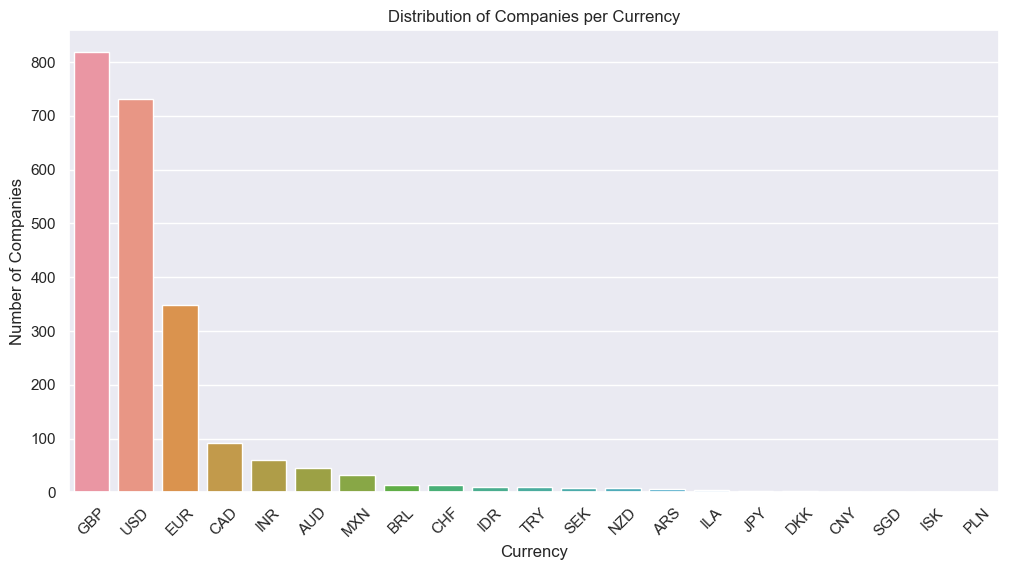

In [30]:
# Plot the distribution of companies per currency
plt.figure(figsize=(12,6))
sns.barplot(x=currency_counts.index, y=currency_counts.values)
plt.title('Distribution of Companies per Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)

# Display the plot
plt.show()

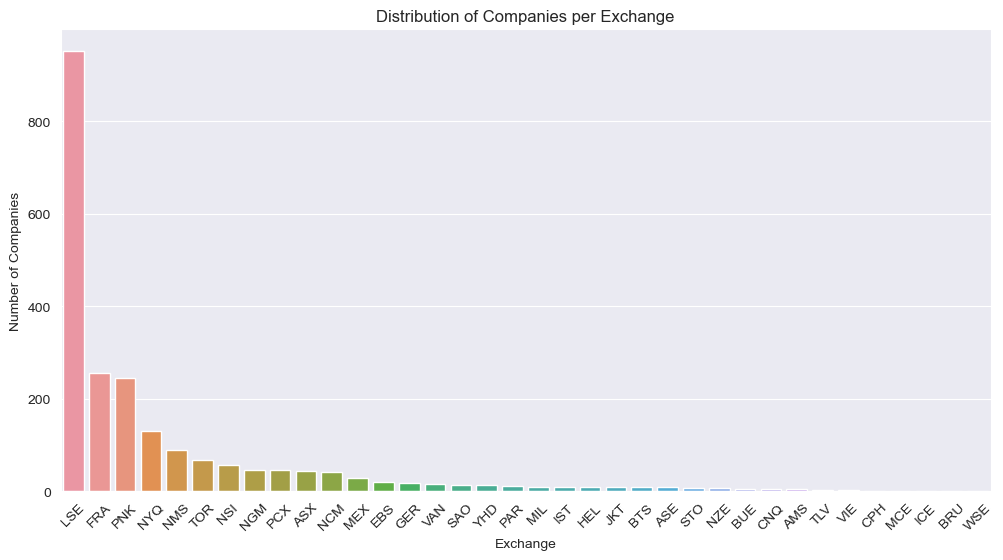

In [19]:
# Plot the distribution of companies per exchange
plt.figure(figsize=(12,6))
sns.barplot(x=exchange_counts.index, y=exchange_counts.values)
plt.title('Distribution of Companies per Exchange')
plt.xlabel('Exchange')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [20]:
# Display the most common currency and exchange
print('The most common currency is {}.'.format(most_common_currency))
print('The most common exchange is {}.'.format(most_common_exchange))

The most common currency is GBP.
The most common exchange is LSE.


## Price Distribution Analysis

- Explore the distribution of opening, highest, lowest, closing, and adjusted closing prices.

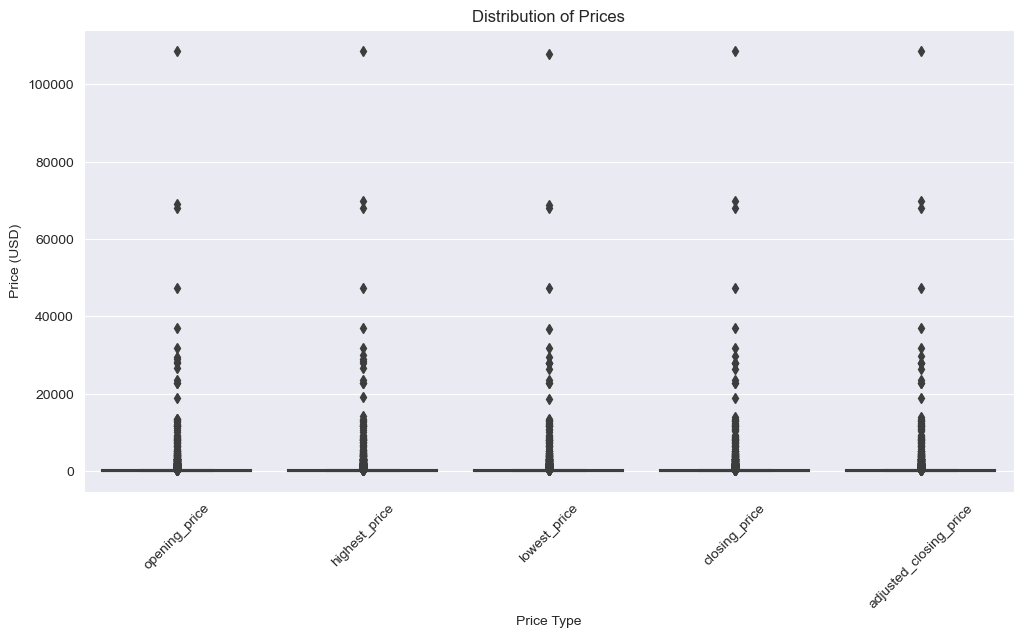

In [25]:
# Extract the price columns
price_columns = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'adjusted_closing_price']

# Visualize the distribution of the prices
plt.figure(figsize=(12,6))
sns.boxplot(data=df[price_columns])
plt.title('Distribution of Prices')
plt.xlabel('Price Type')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Correlation Analysis

- Examine correlations between different numeric columns

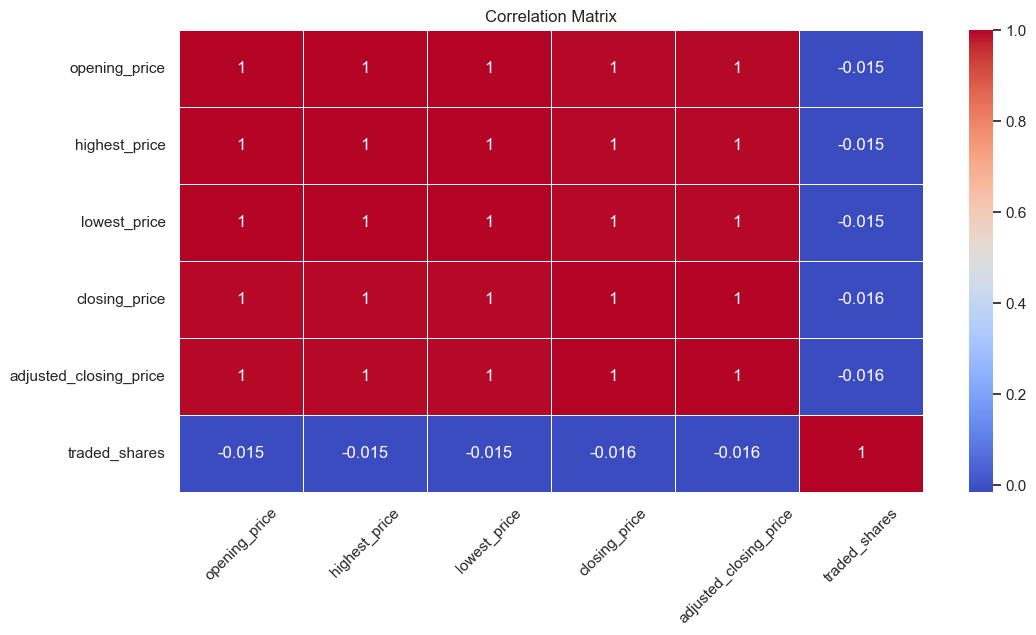

In [32]:
# Numeric columns
numeric_columns = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'adjusted_closing_price', 'traded_shares']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)

# Display the plot
plt.show()